In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
from sklearn.utils import resample
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint


2023-03-24 12:02:45.528118: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [3]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Load train and test data from CSV files
train_df = pd.read_csv('/Users/feliperivas/Downloads/archive-2/mitbih_train.csv')
test_df = pd.read_csv('/Users/feliperivas/Downloads/archive-2/mitbih_test.csv')

# Separate features and labels from the data
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Encode labels as integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# One-hot encode the label data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshape the data to fit into a 1D CNN model
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Define the CNN model architecture
model = Sequential()
model.add(Conv1D(32, 5, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_test, y_test))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model,history=network(X_train,y_train,X_test,y_test)


2023-03-24 12:02:58.100595: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
685/685 [==============================] - 30s 43ms/step - loss: 0.2843 - accuracy: 0.9214 - val_loss: 0.1667 - val_accuracy: 0.9529
Epoch 2/50
685/685 [==============================] - 31s 45ms/step - loss: 0.1634 - accuracy: 0.9549 - val_loss: 0.1275 - val_accuracy: 0.9629
Epoch 3/50
685/685 [==============================] - 31s 45ms/step - loss: 0.1378 - accuracy: 0.9621 - val_loss: 0.1167 - val_accuracy: 0.9653
Epoch 4/50
685/685 [==============================] - 31s 45ms/step - loss: 0.1244 - accuracy: 0.9655 - val_loss: 0.1025 - val_accuracy: 0.9698
Epoch 5/50
685/685 [==============================] - 31s 45ms/step - loss: 0.1107 - accuracy: 0.9697 - val_loss: 0.1087 - val_accuracy: 0.9719
Epoch 6/50
685/685 [==============================] - 31s 46ms/step - loss: 0.1017 - accuracy: 0.9716 - val_loss: 0.0931 - val_accuracy: 0.9751
Epoch 7/50
685/685 [==============================] - 31s 45ms/step - loss: 0.0950 - accuracy: 0.9734 - val_loss: 0.0877 - val_accuracy:

In [4]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from sklearn.preprocessing import LabelEncoder

# Load train and test data from CSV files
train_df = pd.read_csv('/Users/feliperivas/Downloads/archive-2/mitbih_train.csv')
test_df = pd.read_csv('/Users/feliperivas/Downloads/archive-2/mitbih_test.csv')

# Separate features and labels from the data
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Encode labels as integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Reshape the data to fit into a 1D CNN model
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Define the CNN model architecture
model = Sequential()
model.add(Conv1D(32, 5, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_test, y_test))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model,history=network(X_train,y_train,X_test,y_test)


In [5]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [6]:
# model,history=network(X_train,y_train,X_test,y_test)

Accuracy: 98.30%


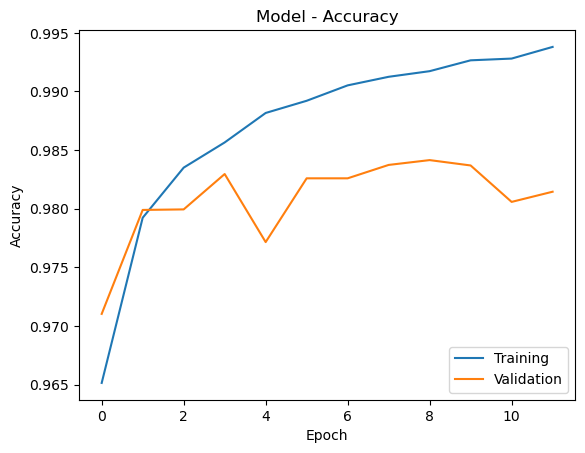

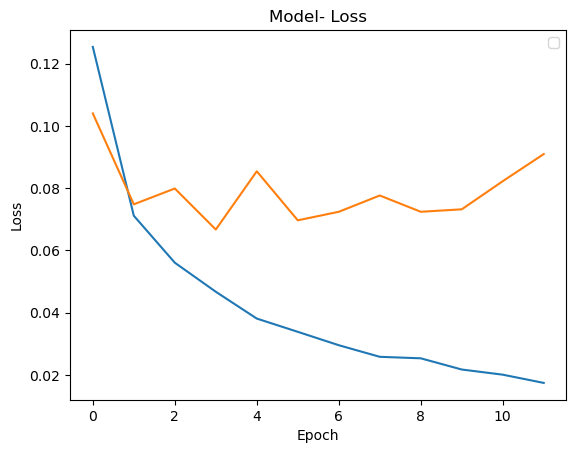

685/685 [==============================] - 2s 3ms/step


In [7]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

In [8]:
model.save('my_modelCNN.h5')

In [9]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('my_modelCNN.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('my_modelCNN.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: /var/folders/1c/h938_tcs77n4rzyrc275t7b00000gn/T/tmp_090ujmg/assets


INFO:tensorflow:Assets written to: /var/folders/1c/h938_tcs77n4rzyrc275t7b00000gn/T/tmp_090ujmg/assets
2023-03-24 12:33:51.368235: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-03-24 12:33:51.368251: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-03-24 12:33:51.368862: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/1c/h938_tcs77n4rzyrc275t7b00000gn/T/tmp_090ujmg
2023-03-24 12:33:51.372908: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-03-24 12:33:51.372920: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/1c/h938_tcs77n4rzyrc275t7b00000gn/T/tmp_090ujmg
2023-03-24 12:33:51.386209: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-03-24 12:33:51.389490: I tensorflow/cc/saved_model/load

In [ ]:
model.save('my_modelDT.h5')